In [1]:
# Import packages
import os
import sys
import datetime
import numpy as np
import pandas as pd
import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline

# Data Exploration

In [2]:
# Set date timestamps for historical data download
start_date = datetime.datetime(2010, 1, 1).date()
end_date = pd.Timestamp.now().strftime('%Y-%m-%d')
end_date = datetime.datetime.strptime(end_date, '%Y-%m-%d').date()
start_date, end_date

(datetime.date(2010, 1, 1), datetime.date(2023, 6, 3))

In [3]:
end_date - start_date

datetime.timedelta(days=4901)

In [4]:
ticker = "FRSH"
# ticker = "MSFT"
# ticker = "FB"

In [5]:
msft = yf.Ticker(ticker)

msft

yfinance.Ticker object <FRSH>

In [6]:
msft.info

{'address1': '2950 South Delaware Street',
 'address2': 'Suite 201',
 'city': 'San Mateo',
 'state': 'CA',
 'zip': '94403',
 'country': 'United States',
 'phone': '650 513 0514',
 'website': 'https://www.freshworks.com',
 'industry': 'Software—Application',
 'industryDisp': 'Software—Application',
 'sector': 'Technology',
 'longBusinessSummary': "Freshworks Inc., a software development company, provides modern software-as-a-service products worldwide. It offers Freshdesk Support Desk that enables businesses to delight their customers at every service engagement touchpoint across traditional channels, including email, and modern channels, such as messaging and social media; Freshdesk Contact Center that offers agents with cloud-based telephony system to connect with customers that supports complex call-flows, number and call management, IVR, and routing needs, as well as live dashboard and reports; and Freshdesk Customer Success, which helps customer success managers at business to busi

In [7]:
historical_data = msft.history(start=start_date, end=end_date, interval="1d").reset_index()

historical_data.shape

(427, 8)

In [8]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-09-22 00:00:00-04:00,43.250000,48.750000,43.119999,47.549999,20142100,0.0,0.0
1,2021-09-23 00:00:00-04:00,47.556999,49.250000,45.549999,47.540001,4258900,0.0,0.0
2,2021-09-24 00:00:00-04:00,47.000000,48.380001,46.099998,46.750000,1725300,0.0,0.0
3,2021-09-27 00:00:00-04:00,47.338001,47.480000,43.250000,44.049999,1917800,0.0,0.0
4,2021-09-28 00:00:00-04:00,43.020000,43.650002,40.050999,42.730000,4647700,0.0,0.0


The above data shows stock prices on per day basis.

+ High: Max stock price on that particular day
+ Low: Lowest price went on that particular day
+ Open: Stock price opening on that particular day
+ Close: Final closing price of the stock on that particular day
+ Volume: Amount of stock traded on that day
+ Dividends: Dividens given (if any)
+ Stock Splits: Stock split happend on that particular day (if any)

In [9]:
historical_data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,427.000000,427.000000,427.000000,427.000000,4.270000e+02,427.0,427.0
mean,19.207628,19.876103,18.554267,19.197916,2.121568e+06,0.0,0.0
std,8.974837,9.327224,8.582769,8.935320,1.693428e+06,0.0,0.0
min,10.740000,11.410000,10.510000,10.880000,1.976000e+05,0.0,0.0
25%,14.000000,14.420000,13.565000,13.995000,1.176550e+06,0.0,0.0
50%,15.200000,15.690000,14.820000,15.320000,1.647700e+06,0.0,0.0
75%,19.940001,20.844999,18.900000,20.050000,2.586900e+06,0.0,0.0
max,50.029999,53.355999,46.369999,50.250000,2.014210e+07,0.0,0.0


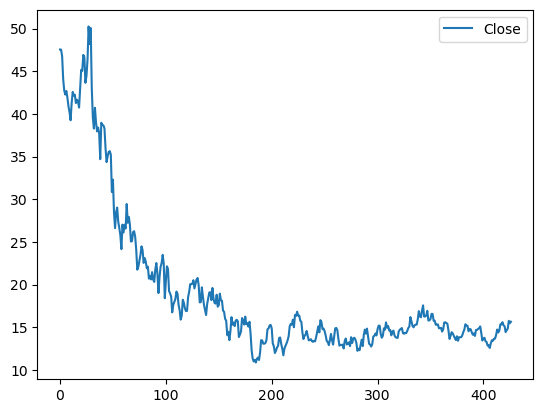

In [10]:
fig = plt.figure()

plt.plot(historical_data.Close)

plt.legend(["Close", "Open"])

# Feature Engineering

In [11]:
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-09-22 00:00:00-04:00,43.250000,48.750000,43.119999,47.549999,20142100,0.0,0.0
1,2021-09-23 00:00:00-04:00,47.556999,49.250000,45.549999,47.540001,4258900,0.0,0.0
2,2021-09-24 00:00:00-04:00,47.000000,48.380001,46.099998,46.750000,1725300,0.0,0.0
3,2021-09-27 00:00:00-04:00,47.338001,47.480000,43.250000,44.049999,1917800,0.0,0.0
4,2021-09-28 00:00:00-04:00,43.020000,43.650002,40.050999,42.730000,4647700,0.0,0.0


In [12]:
# Create lag features
for i in range(1, 7):
    historical_data[f"Close_lag_{i}"] = historical_data.Close.shift(periods=i, axis=0)
    historical_data[f"Open_lag_{i}"] = historical_data.Open.shift(periods=i, axis=0)
    historical_data[f"High_lag_{i}"] = historical_data.High.shift(periods=i, axis=0)
    historical_data[f"Low_lag_{i}"] = historical_data.Low.shift(periods=i, axis=0)

historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2021-09-22 00:00:00-04:00,43.250000,48.750000,43.119999,47.549999,20142100,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-09-23 00:00:00-04:00,47.556999,49.250000,45.549999,47.540001,4258900,0.0,0.0,47.549999,43.250000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-09-24 00:00:00-04:00,47.000000,48.380001,46.099998,46.750000,1725300,0.0,0.0,47.540001,47.556999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-09-27 00:00:00-04:00,47.338001,47.480000,43.250000,44.049999,1917800,0.0,0.0,46.750000,47.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-09-28 00:00:00-04:00,43.020000,43.650002,40.050999,42.730000,4647700,0.0,0.0,44.049999,47.338001,...,48.75,43.119999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
historical_data.fillna(0, inplace=True)
historical_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Close_lag_1,Open_lag_1,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2021-09-22 00:00:00-04:00,43.250000,48.750000,43.119999,47.549999,20142100,0.0,0.0,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-23 00:00:00-04:00,47.556999,49.250000,45.549999,47.540001,4258900,0.0,0.0,47.549999,43.250000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-24 00:00:00-04:00,47.000000,48.380001,46.099998,46.750000,1725300,0.0,0.0,47.540001,47.556999,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-27 00:00:00-04:00,47.338001,47.480000,43.250000,44.049999,1917800,0.0,0.0,46.750000,47.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-28 00:00:00-04:00,43.020000,43.650002,40.050999,42.730000,4647700,0.0,0.0,44.049999,47.338001,...,48.75,43.119999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
historical_data.drop(
    columns=["Dividends", "Stock Splits", "Volume", "Open", "High", "Low"], inplace=True)

In [15]:
# # Create a holiday dataframe
# min_date, max_date = historical_data.Date.min(), historical_data.Date.max()
# print("Min/Max dates:", min_date, max_date)

# date_range = pd.date_range(start=min_date, end=max_date)
# print("Date range:", date_range.min(), date_range.max())

# # Find dates not present in historical df - closed stock market holiday
# holiday_date_range = [d.date() for d in date_range if d not in historical_data.Date]
# holiday_date_range[:5]

In [16]:
# holidays = pd.DataFrame({
#     "holiday": "shutdown",
#     "ds": pd.to_datetime(holiday_date_range),
#     "lower_bound": 0,
#     "upper_bound": 1,
# })

# holidays.head()

# Modelling

## Facebook's Prophet: Single Timestep Forecasting

References: 
+ https://facebook.github.io/prophet/

In [17]:
import fbprophet as prophet

In [18]:
validation_period = 30 # 30 days

train, validation = historical_data.iloc[:-validation_period], historical_data.iloc[-validation_period:]

train.shape, validation.shape

((397, 26), (30, 26))

In [19]:
train.head()

,Date,Close,Close_lag_1,Open_lag_1,High_lag_1,Low_lag_1,Close_lag_2,Open_lag_2,High_lag_2,Low_lag_2,...,High_lag_4,Low_lag_4,Close_lag_5,Open_lag_5,High_lag_5,Low_lag_5,Close_lag_6,Open_lag_6,High_lag_6,Low_lag_6
0,2021-09-22 00:00:00-04:00,47.549999,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-09-23 00:00:00-04:00,47.540001,47.549999,43.250000,48.750000,43.119999,0.000000,0.000000,0.000000,0.000000,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-09-24 00:00:00-04:00,46.750000,47.540001,47.556999,49.250000,45.549999,47.549999,43.250000,48.750000,43.119999,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-09-27 00:00:00-04:00,44.049999,46.750000,47.000000,48.380001,46.099998,47.540001,47.556999,49.250000,45.549999,...,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-09-28 00:00:00-04:00,42.730000,44.049999,47.338001,47.480000,43.250000,46.750000,47.000000,48.380001,46.099998,...,48.75,43.119999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Train and Forecast

In [20]:
lag_features = [col for col in historical_data.columns if "lag" in col]

In [21]:
model = prophet.Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=True,seasonality_mode="additive")
for name in lag_features:
    model.add_regressor(name)

# Convert ds column to datetime object
historical_data['Date'] = pd.to_datetime(historical_data['Date'])

# Remove timezone information
historical_data['Date'] = historical_data['Date'].dt.tz_localize(None)

model.fit(df=historical_data.iloc[:-1, :].rename(columns={"Date": "ds", "Close":"y"}))

In [22]:
# Remove timezone information
validation['Date'] = validation['Date'].dt.tz_localize(None)
forecast = model.predict(validation[[col for col in validation.columns if col != "Close"]].rename(columns={"Date": "ds"}))

forecast.shape

C:\Users\natus\anaconda3\envs\be_proj_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(30, 97)

In [23]:
forecast.head(10)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_lag_1,Close_lag_1_lower,Close_lag_1_upper,Close_lag_2,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-04-21,18.528028,13.822129,16.764752,18.528028,18.528028,-4.219859,-4.219859,-4.219859,-1.179791,...,-0.195044,-0.195044,-0.195044,0.570472,0.570472,0.570472,0.0,0.0,0.0,15.333345
1,2023-04-24,18.553397,13.947320,16.755154,18.553397,18.553397,-4.031643,-4.031643,-4.031643,-1.149839,...,-0.228471,-0.228471,-0.228471,0.443461,0.443461,0.443461,0.0,0.0,0.0,15.416826
2,2023-04-25,18.561853,13.651720,16.476884,18.561853,18.561853,-4.794409,-4.794409,-4.794409,-1.098104,...,-0.077770,-0.077770,-0.077770,0.375166,0.375166,0.375166,0.0,0.0,0.0,15.071337
3,2023-04-26,18.570310,12.653563,15.446045,18.570310,18.570310,-5.666141,-5.666141,-5.666141,-1.307766,...,-0.100661,-0.100661,-0.100661,0.294834,0.294834,0.294834,0.0,0.0,0.0,14.022459
4,2023-04-27,18.578766,12.824535,15.628721,18.578766,18.578766,-5.418490,-5.418490,-5.418490,-1.547379,...,-0.163024,-0.163024,-0.163024,0.203601,0.203601,0.203601,0.0,0.0,0.0,14.283172
5,2023-04-28,18.587222,12.859867,15.704927,18.587222,18.587222,-5.339242,-5.339242,-5.339242,-1.479307,...,-0.195044,-0.195044,-0.195044,0.102960,0.102960,0.102960,0.0,0.0,0.0,14.269848
6,2023-05-01,18.612591,12.302825,15.276012,18.612591,18.612591,-5.755296,-5.755296,-5.755296,-1.457524,...,-0.228471,-0.228471,-0.228471,-0.236049,-0.236049,-0.236049,0.0,0.0,0.0,13.785218
7,2023-05-02,18.621047,12.425623,15.321948,18.621047,18.621047,-5.834544,-5.834544,-5.834544,-1.571885,...,-0.077770,-0.077770,-0.077770,-0.353844,-0.353844,-0.353844,0.0,0.0,0.0,13.791702
8,2023-05-03,18.629504,12.092303,14.852695,18.629504,18.629504,-6.260503,-6.260503,-6.260503,-1.593668,...,-0.100661,-0.100661,-0.100661,-0.469915,-0.469915,-0.469915,0.0,0.0,0.0,13.485809
9,2023-05-04,18.637960,11.299755,14.196230,18.637960,18.637960,-6.220879,-6.220879,-6.220879,-1.710751,...,-0.163024,-0.163024,-0.163024,-0.581741,-0.581741,-0.581741,0.0,0.0,0.0,12.752466


### Visualize forecasts

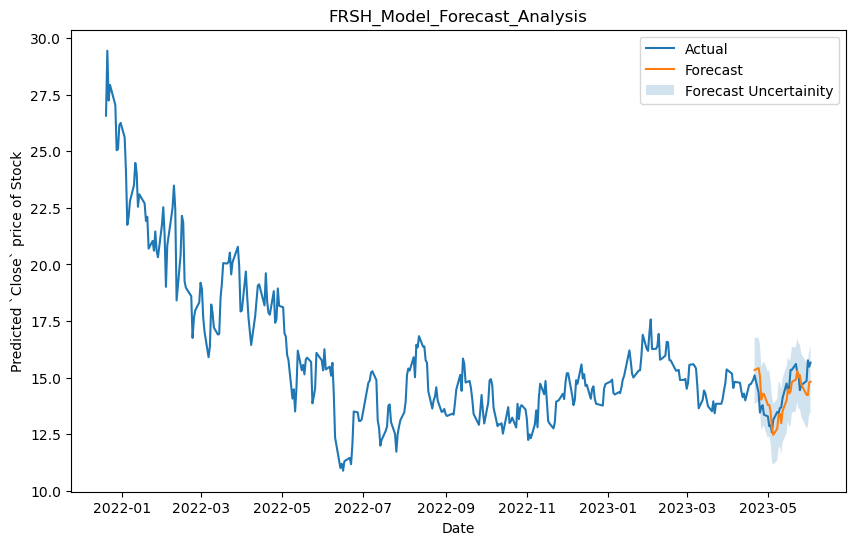

In [24]:
# Plotting predictions and uncertainity interval with respect to actuals
fig = plt.figure(figsize=(10, 6))

# Plot actuals
plt.plot(historical_data.Date.iloc[-365:], historical_data.Close.iloc[-365:])

# Plot forecasts for the latest 365 days as validation period
plt.plot(forecast.ds, forecast.yhat)

# Plot uncertainity - lower and upper bound for the forecasts
plt.fill_between(forecast.ds, forecast.yhat_lower, forecast.yhat_upper, alpha=0.2)

plt.xlabel("Date")
plt.ylabel("Predicted `Close` price of Stock")
plt.legend(["Actual", "Forecast", "Forecast Uncertainity"])
plt.title(f"{ticker}_Model_Forecast_Analysis")
plt.show()

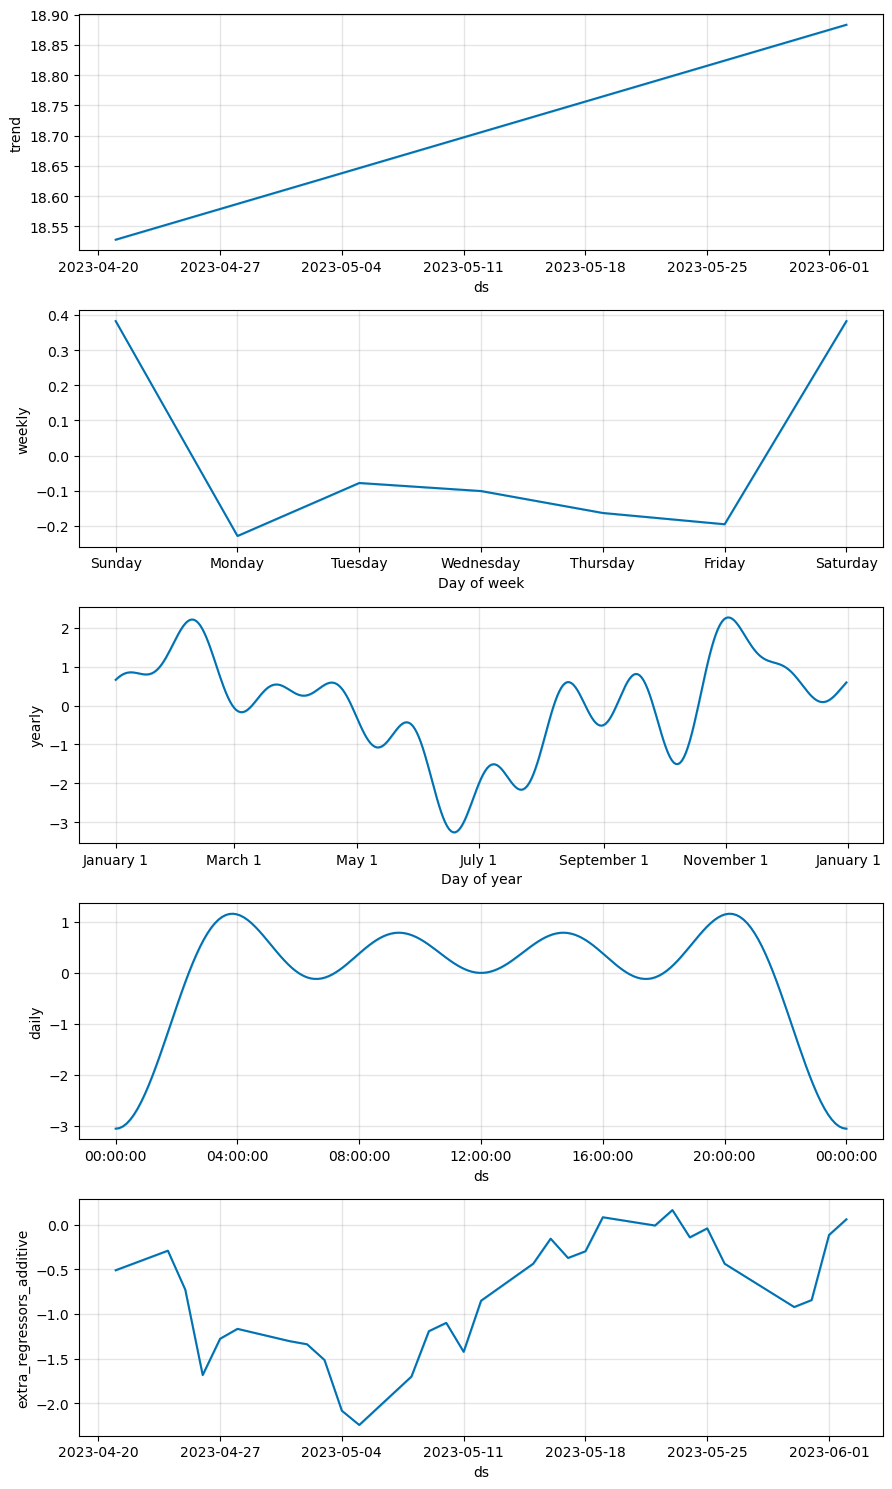

In [26]:
fig = model.plot_components(forecast)

### Evaluate model performance

In [27]:
validation.Date.min(), validation.Date.max()

(Timestamp('2023-04-21 00:00:00'), Timestamp('2023-06-02 00:00:00'))

In [28]:
forecast.ds.min(), forecast.ds.max()

(Timestamp('2023-04-21 00:00:00'), Timestamp('2023-06-02 00:00:00'))

In [31]:
df = prophet.diagnostics.cross_validation(model,initial='400 days', period='180 days', horizon = '100 days')
df.head()

INFO:fbprophet:Making 1 forecasts with cutoffs between 2023-02-21 00:00:00 and 2023-02-21 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-22,16.097224,14.636948,17.470030,15.31,2023-02-21
1,2023-02-23,16.001597,14.588572,17.468290,15.34,2023-02-21
2,2023-02-24,15.963126,14.528480,17.455257,14.89,2023-02-21
3,2023-02-27,15.456690,14.120078,16.887488,14.90,2023-02-21
4,2023-02-28,15.687464,14.280276,17.071368,14.94,2023-02-21


In [32]:
df_p = prophet.diagnostics.performance_metrics(df)
df_p.head()

,horizon,mse,rmse,mae,mape,mdape,coverage
0,9 days,0.746187,0.863821,0.834821,0.056031,0.051419,1.000000
1,10 days,0.716351,0.846375,0.813930,0.054571,0.050031,1.000000
2,13 days,1.011181,1.005575,0.945362,0.062902,0.052443,0.857143
3,14 days,1.308867,1.144057,1.049018,0.069174,0.052443,0.714286
4,15 days,1.944201,1.394346,1.281078,0.084069,0.085765,0.571429
